# Part 1: Big Data Processing

# Task 1: Data Cleaning and Exploration

# 1. Load the dataset into a Pandas DataFrame and print the meta data of column information.

In [52]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# TensorFlow/Keras imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


sns.set(style="whitegrid")
%matplotlib inline  


In [5]:
df = pd.read_csv(r"C:\Users\siddh\Desktop\MS_Study\Spring 2025\Data Intensive Computing\Assignment 1\NVDA.csv")
print("\nDataset Info:")
df.info() 

print("\nFirst 5 Rows of Dataset:")
display(df.head())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       522 non-null    object 
 1   Open       521 non-null    float64
 2   High       522 non-null    float64
 3   Low        523 non-null    float64
 4   Close      522 non-null    float64
 5   Adj Close  523 non-null    float64
 6   Volume     521 non-null    float64
dtypes: float64(6), object(1)
memory usage: 28.7+ KB

First 5 Rows of Dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022/7/1,14.899,15.063000,14.392,14.523,14.506663,577610000.0
1,2022/7/5,14.175,14.971000,14.055,14.964,14.947166,651397000.0
2,2022/7/6,15.010,15.319000,14.789,15.130,15.112980,529066000.0
3,2022/7/7,15.456,15.945000,15.389,15.858,15.840160,492903000.0
4,2022/7/8,15.430,16.037001,15.389,15.838,15.820185,467972000.0


# 2. Check for missing values and handle them appropriately.

In [7]:
print("\nMissing Values Per Column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) 


Missing Values Per Column:
Date      1
Open      2
High      1
Close     1
Volume    2
dtype: int64


In [8]:
df.fillna({'Date': df['Date'].ffill(), 
           'Open': df['Open'].ffill(), 
           'High': df['High'].ffill(), 
           'Close': df['Close'].ffill(), 
           'Volume': df['Volume'].median()}, inplace=True)

print("\n Missing Values After Handling:")
print(df.isnull().sum())


 Missing Values After Handling:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# 3. Convert the date column to a different datetime format

In [10]:
df['Date'] = pd.to_datetime(df['Date']) 
df['Date_formatted'] = df['Date'].dt.strftime('%d-%m-%Y')  

print(df[['Date', 'Date_formatted']].head())


        Date Date_formatted
0 2022-07-01     01-07-2022
1 2022-07-05     05-07-2022
2 2022-07-06     06-07-2022
3 2022-07-07     07-07-2022
4 2022-07-08     08-07-2022


# 4. Compute basic statistics (min, max, mean, median, standard deviation) for each numerical feature.

In [70]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

print("\n Basic Statistics for Numerical Features")
for col in numeric_cols:
    print(f"\n{col}:")
    print(f"  Min: {df[col].min()}")
    print(f"  Max: {df[col].max()}")
    print(f"  Mean: {df[col].mean()}")
    print(f"  Median: {df[col].median()}")
    print(f"  Standard Deviation: {df[col].std()}")



 Basic Statistics for Numerical Features

Open:
  Min: 10.971
  Max: 139.800003
  Mean: 46.92134795411089
  Median: 42.321999
  Standard Deviation: 32.99460807074795

High:
  Min: 11.735
  Max: 140.759995
  Mean: 47.77337285468452
  Median: 43.0
  Standard Deviation: 33.56795208828847

Low:
  Min: 10.813
  Max: 132.419998
  Mean: 46.00918748183556
  Median: 41.654999
  Standard Deviation: 32.21017457790228

Close:
  Min: 0.0
  Max: 1.0
  Mean: 0.28724432436351643
  Median: 0.2500140768616104
  Standard Deviation: 0.26452802363423594

Adj Close:
  Min: 11.217702
  Max: 135.580002
  Mean: 46.93218490057361
  Median: 42.304337
  Standard Deviation: 32.892753324228046

Volume:
  Min: 167934000.0
  Max: 1543911000.0
  Mean: 483429610.3250478
  Median: 457328000.0
  Standard Deviation: 157556862.10013533


# 5. Plot the closing price over time using Matplotlib.

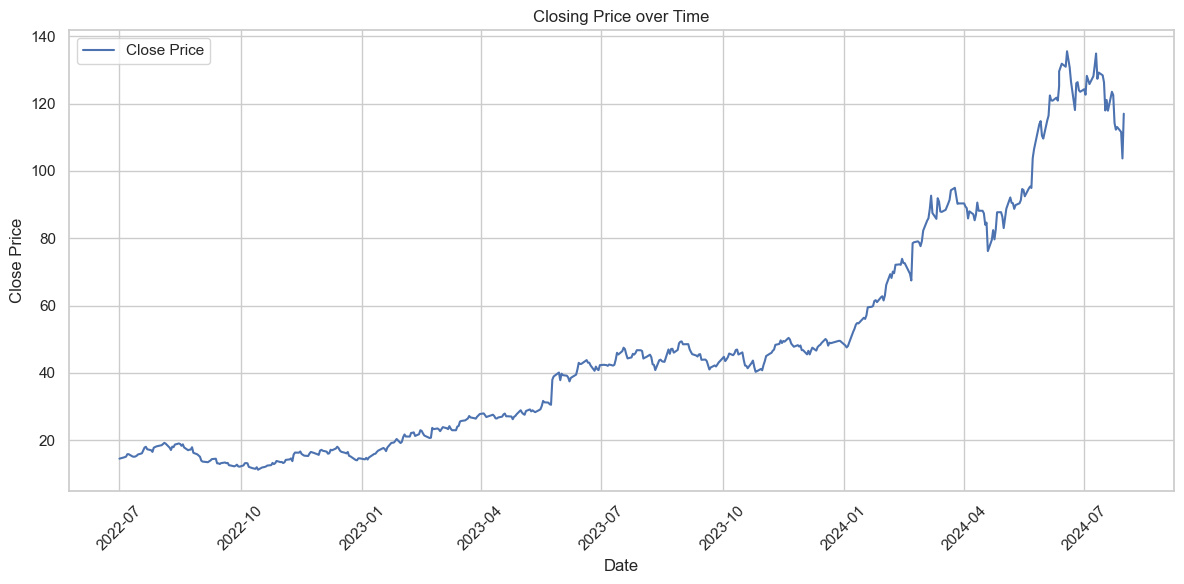

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Price over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Task 2: Feature Engineering

# 1. Create a new column for daily returns based on the adjusted closing price (0 for the first day) and print the top 10 dates with the highest daily return.

In [17]:
df['Daily_Return'] = df['Adj Close'].pct_change().fillna(0)
print(df.nlargest(10, 'Daily_Return')[['Date', 'Daily_Return']])


          Date  Daily_Return
226 2023-05-25      0.243696
412 2024-02-22      0.164009
92  2022-11-10      0.143293
162 2023-02-23      0.140214
522 2024-07-31      0.128121
476 2024-05-23      0.093197
285 2023-08-21      0.084713
105 2022-11-30      0.082379
17  2022-07-27      0.076030
140 2023-01-23      0.075901


# 2. Create a new column for the 7-day moving average of the closing price and plot it with Matplotlib.

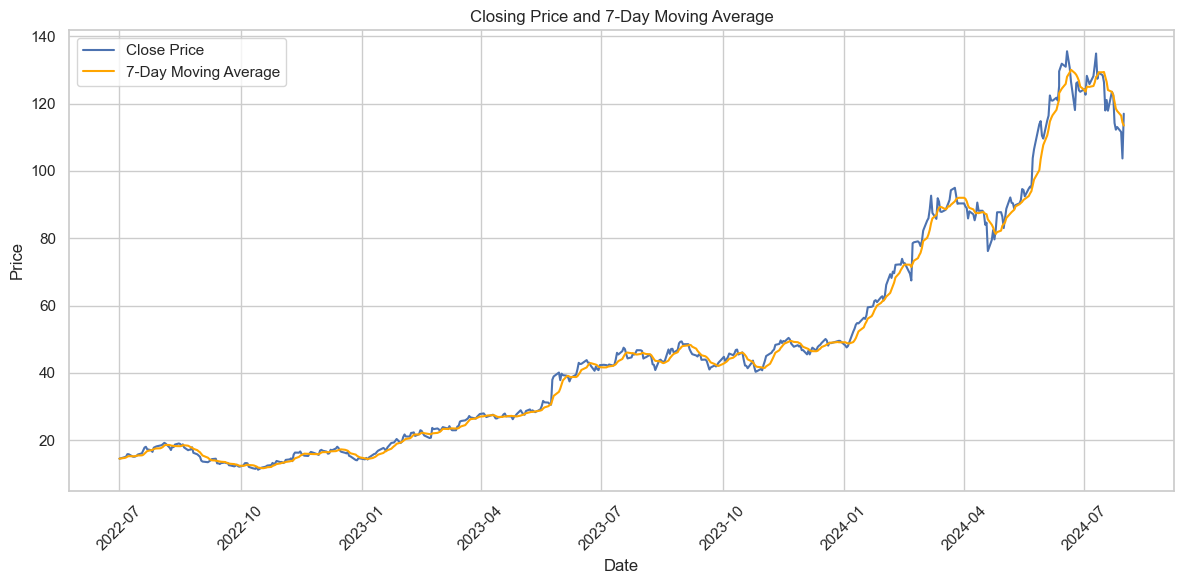

In [19]:
df['7Day_MA'] = df['Close'].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['7Day_MA'], label='7-Day Moving Average', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Price and 7-Day Moving Average')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Normalize Trading volume column using Min-Max Scaling and print the top 10 dates with the highest volume.

In [21]:
scaler = MinMaxScaler()
df['Normalized_Volume'] = scaler.fit_transform(df[['Volume']])

top_volumes = df.nlargest(10, 'Volume')[['Date', 'Volume', 'Normalized_Volume']]

print("\nTop 10 Dates with Highest Trading Volume:")
display(top_volumes)



Top 10 Dates with Highest Trading Volume:


,Date,Volume,Normalized_Volume
226,2023-05-25,1.543911e+09,1.000000
43,2022-09-01,1.178865e+09,0.734701
288,2023-08-24,1.156044e+09,0.718115
423,2024-03-08,1.142269e+09,0.708104
162,2023-02-23,1.117995e+09,0.690463
229,2023-05-31,1.002580e+09,0.606584
25,2022-08-08,9.818590e+08,0.591525
264,2023-07-21,9.637690e+08,0.578378
289,2023-08-25,9.253410e+08,0.550450
228,2023-05-30,9.234010e+08,0.549040


# Task 3: Data Visualization

# 1. Create a histogram of daily returns.

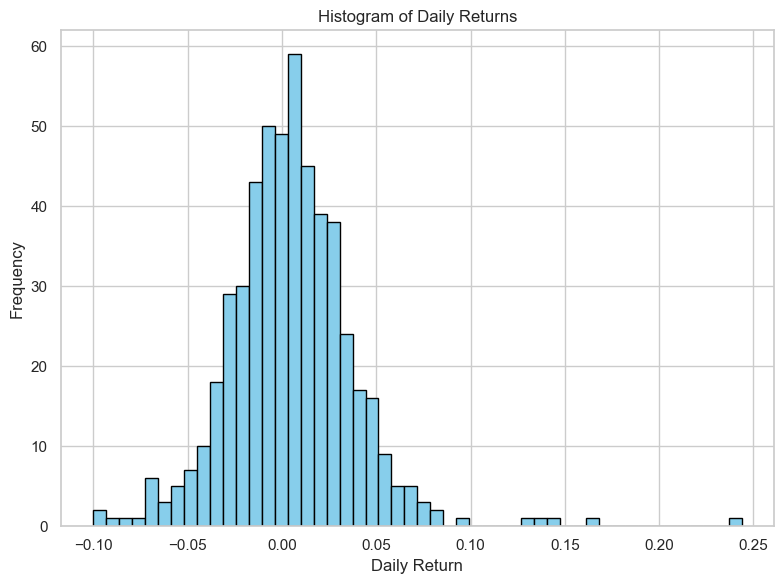

In [24]:
plt.figure(figsize=(8,6))
plt.hist(df['Daily_Return'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Returns')
plt.tight_layout()
plt.show()

# 2. Generate a boxplot of the trading volume.

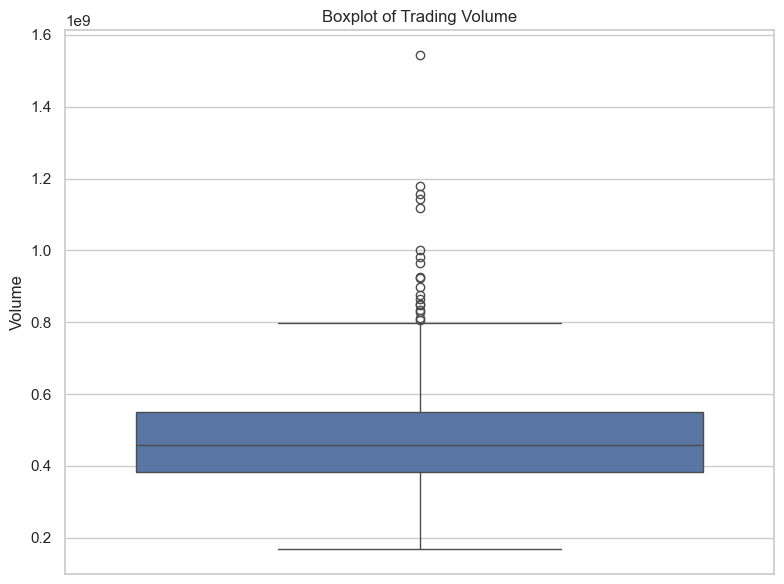

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Volume'])
plt.title('Boxplot of Trading Volume')
plt.tight_layout()
plt.show()

# 3. Display a correlation heatmap of all numerical features.

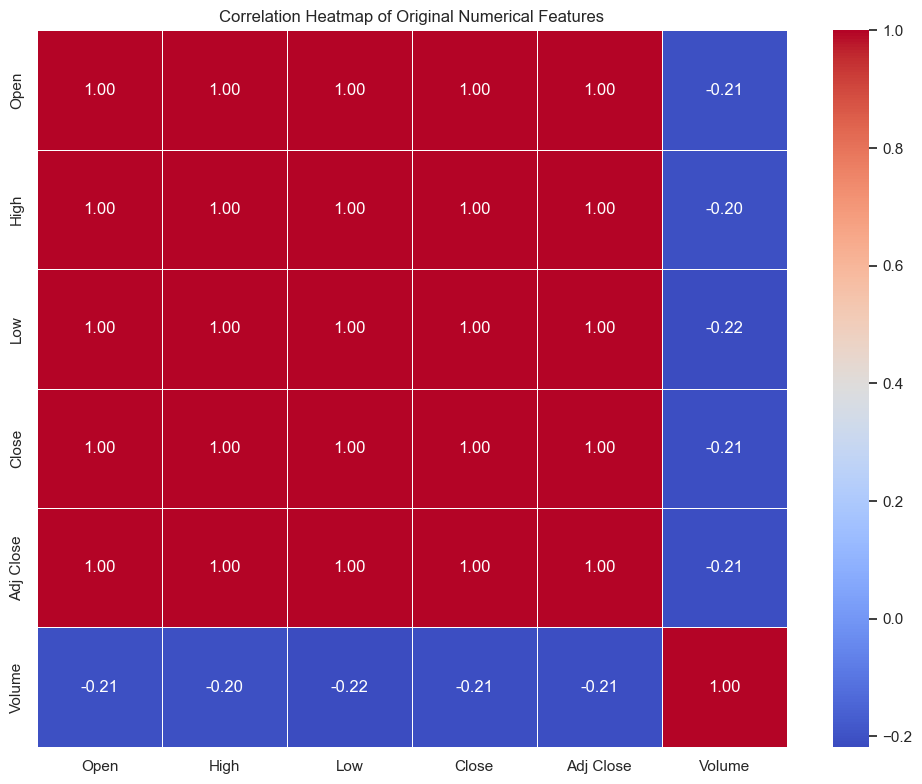

In [28]:
orig_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
corr_matrix = df[orig_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Original Numerical Features')
plt.tight_layout()
plt.show()

# Part 2: Machine Learning

# Task 1: Clustering with KMeans

# 1. Select relevant features for clustering (e.g., normalized daily return, trading volume, and adjusted close price).

In [32]:
scaler = MinMaxScaler()
df[['Normalized_Daily_Return', 'Normalized_Adj_Close', 'Normalized_Volume']] = \
    scaler.fit_transform(df[['Daily_Return', 'Adj Close', 'Volume']])

# Select features for clustering
clustering_features = df[['Normalized_Daily_Return', 'Normalized_Volume', 'Normalized_Adj_Close']]

# 2. Determine the optimal number of clusters using the elbow method.

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

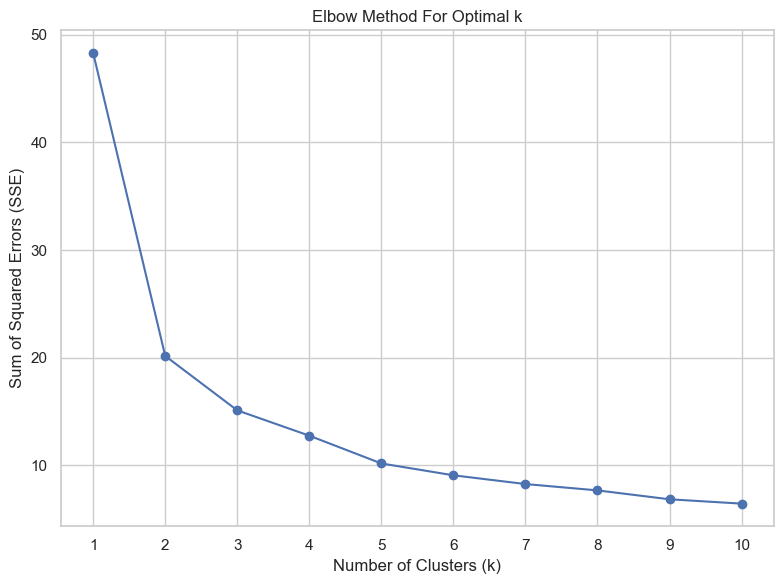

In [34]:
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.tight_layout()
plt.show()


# 3. Apply KMeans clustering and visualize the resulting clusters using a scatter plot.

In [36]:
optimal_k = 3  

# KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(clustering_features)

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


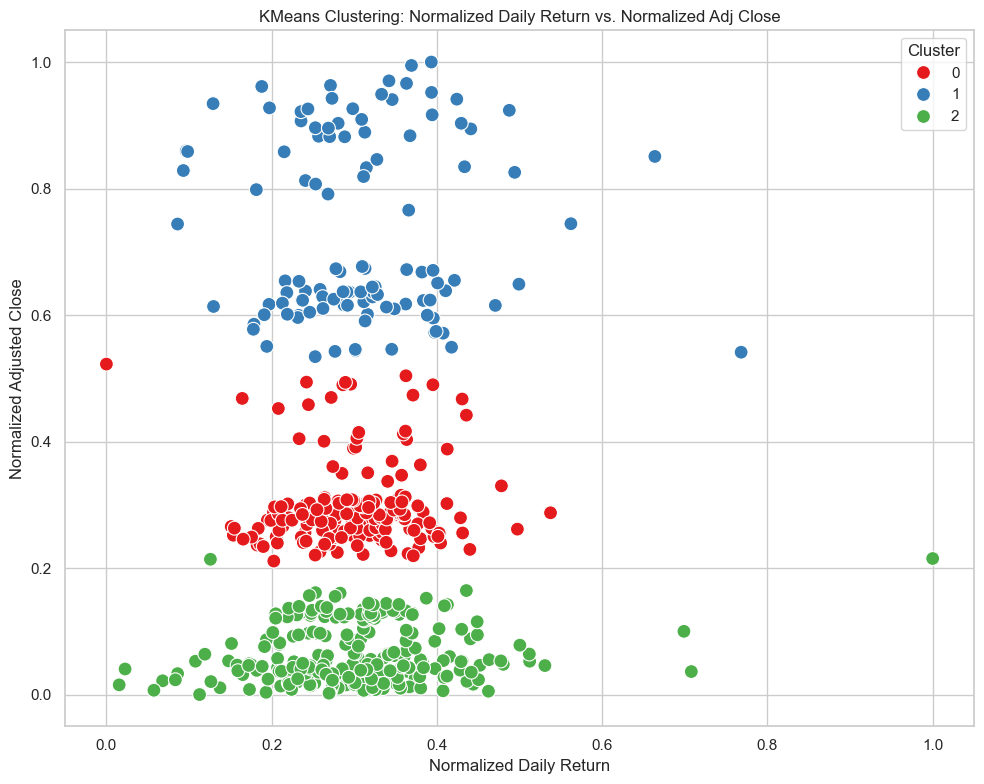

In [37]:
# Visualize the resulting clusters using a scatter plot.
plt.figure(figsize=(10,8))
sns.scatterplot(x='Normalized_Daily_Return', y='Normalized_Adj_Close', 
                hue='Cluster', data=df, palette='Set1', s=100)
plt.xlabel('Normalized Daily Return')
plt.ylabel('Normalized Adjusted Close')
plt.title('KMeans Clustering: Normalized Daily Return vs. Normalized Adj Close')
plt.tight_layout()
plt.show()

# 4. Interpret the clusters

In [39]:
for cluster in sorted(df['Cluster'].unique()):
    print(f"\n Cluster {cluster} Statistics:")
    print(df[df['Cluster'] == cluster][['Daily_Return', 'Normalized_Volume', 'Adj Close']].describe())



 Cluster 0 Statistics:
       Daily_Return  Normalized_Volume   Adj Close
count    185.000000         185.000000  185.000000
mean       0.003160           0.223455   48.191037
std        0.024645           0.108947    8.217178
min       -0.100046           0.022003   37.463783
25%       -0.010686           0.154549   43.032112
50%        0.002970           0.195976   45.945034
75%        0.018804           0.263237   48.983681
max        0.084713           0.718115   76.193741

 Cluster 1 Statistics:
       Daily_Return  Normalized_Volume   Adj Close
count    110.000000         110.000000  110.000000
mean       0.006633           0.198195  102.141636
std        0.036687           0.116575   17.873822
min       -0.070436           0.004344   77.652985
25%       -0.016006           0.110559   87.769791
50%        0.004675           0.190869   92.607392
75%        0.026720           0.255809  120.968546
max        0.164009           0.708104  135.580002

 Cluster 2 Statistics:
       Dai

# Task 2: Other machine learning methods

# Stock Price Prediction:

# Train a regression model LSTM to predict the closing price of the stock based on historical data.

In [66]:
scaler = MinMaxScaler()
scaler.fit(df[['Close']])
df['Close'] = scaler.transform(df[['Close']])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10 
close_prices = df['Close'].values
X, y = create_sequences(close_prices, seq_length)


train_size = int(len(X) * 0.8)

X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]


X_train_shape = (X_train.shape[0], X_train.shape[1], 1)
X_train = np.reshape(X_train, X_train_shape)

X_test_shape = (X_test.shape[0], X_test.shape[1], 1)
X_test = np.reshape(X_test, X_test_shape)


# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

y_pred = model.predict(X_test).flatten()  

y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))

mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print("Mean Squared Error (MSE) after inverse scaling:", mse)


Epoch 1/50


C:\Users\siddh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0213 - val_loss: 0.0065
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - val_loss: 0.0133
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.3259e-04 - val_loss: 0.0112
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2442e-04 - val_loss: 0.0159
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9475e-04 - val_loss: 0.0071
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9293e-04 - val_loss: 0.0067
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
Mean Squared Error (MSE) after inverse scaling: 0.0064689778279248674


# Visualizing the LSTM Model Predictions

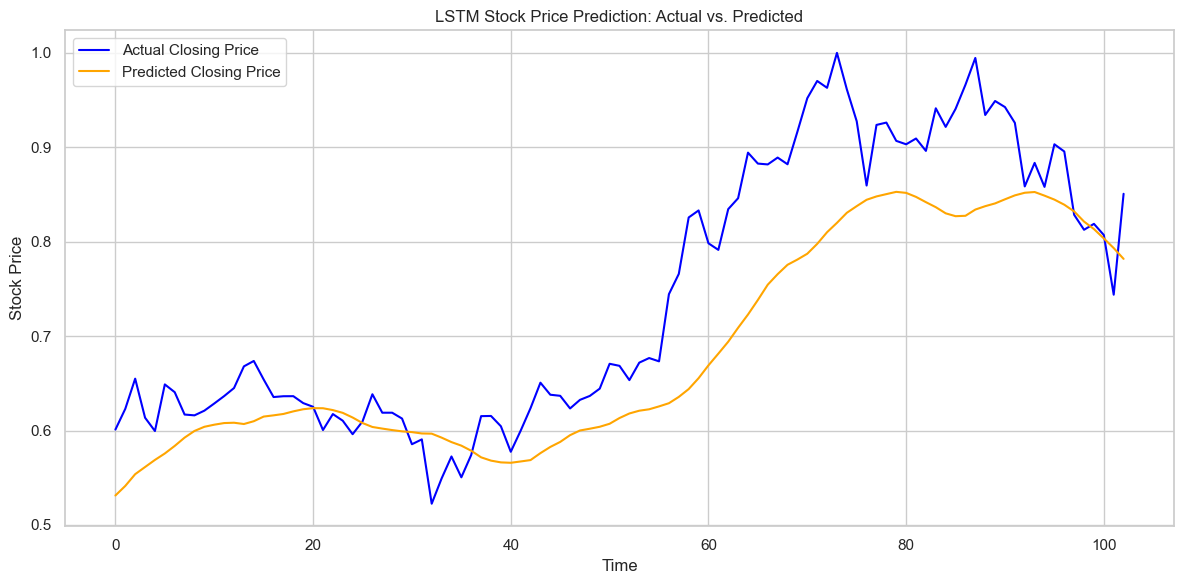

In [68]:
y_pred_reshaped = y_pred.reshape(-1, 1)
y_pred_rescaled = scaler.inverse_transform(y_pred_reshaped)

y_test_reshaped = y_test.reshape(-1, 1)
y_test_rescaled = scaler.inverse_transform(y_test_reshaped)

time_index_start = 0
time_index_end = len(y_test_rescaled)
time_index = range(time_index_start, time_index_end)

plt.figure(figsize=(12,6))
plt.plot(time_index, y_test_rescaled, label="Actual Closing Price", color='blue')
plt.plot(time_index, y_pred_rescaled, label="Predicted Closing Price", color='orange')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("LSTM Stock Price Prediction: Actual vs. Predicted")
plt.legend()
plt.tight_layout()
plt.show()


# LSTM Model with Hyperparameter Tuning

In [54]:
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i : i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30  
X, y = create_sequences(df['Close'].values, seq_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train_shape = (X_train.shape[0], X_train.shape[1], 1)
X_train = X_train.reshape(X_train_shape)

X_test_shape = (X_test.shape[0], X_test.shape[1], 1)
X_test = X_test.reshape(X_test_shape)

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  
    restore_best_weights=True
)

model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

y_pred = model.predict(X_test)

y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mse  = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2   = r2_score(y_test_rescaled, y_pred_rescaled)

metrics = {
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse,
    "Mean Absolute Error (MAE)": mae,
    "R² Score": r2
}
print("\nLSTM Model Performance")
for key, value in metrics.items():
    print(f"{key:<35} {value:.4f}")



Epoch 1/100


C:\Users\siddh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - loss: 0.0219 - val_loss: 0.0192
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0019 - val_loss: 0.0056
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 9.1197e-04 - val_loss: 0.0054
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 9.0832e-04 - val_loss: 0.0057
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 7.4625e-04 - val_loss: 0.0074
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 6.7739e-04 - val_loss: 0.0133
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 5.8902e-04 - val_loss: 0.0173
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6.3392e-04 - val_loss: 0.0112
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step WARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001596D7DD580> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be d

# Visualizing the Improved LSTM Model Predictions

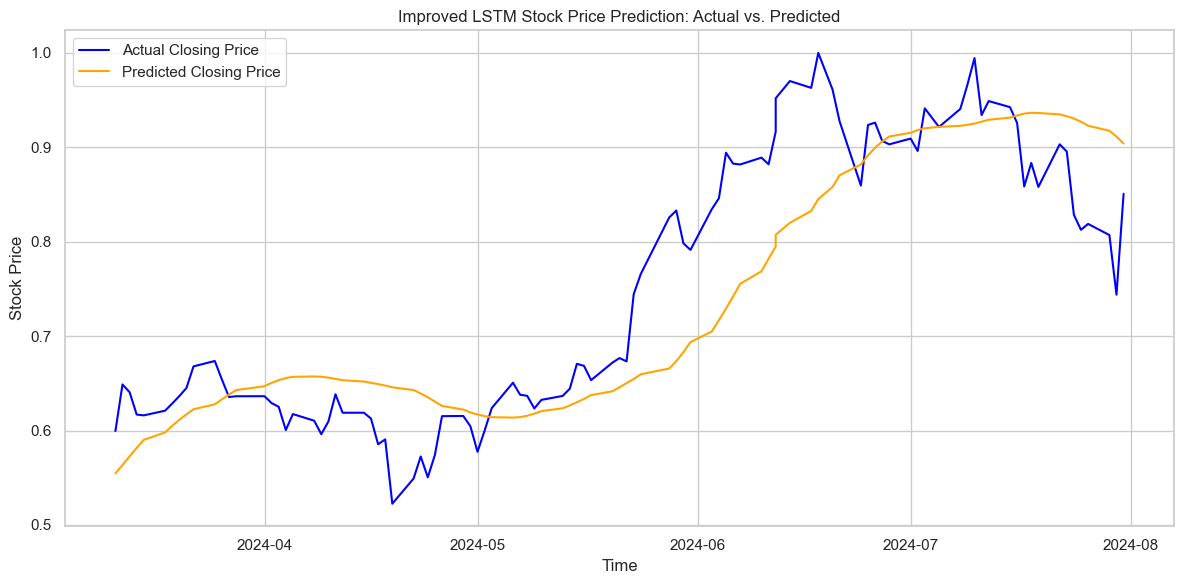

In [56]:
time_index = range(len(y_test_rescaled))

plt.figure(figsize=(12,6))
plt.plot(df['Date'].iloc[-len(y_test_rescaled):], y_test_rescaled, label="Actual Closing Price", color='blue')
plt.plot(df['Date'].iloc[-len(y_pred_rescaled):], y_pred_rescaled, label="Predicted Closing Price", color='orange')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Improved LSTM Stock Price Prediction: Actual vs. Predicted")
plt.legend()
plt.tight_layout()
plt.show()


# Trend Classification:

# Trend Classification: Implement a classification model Support Vector Machine to predict whether the stock price will go up or down the next day.

In [60]:
df['Tomorrow_Up'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.dropna(inplace=True, subset=['Tomorrow_Up'])

features_clf = ['Open', 'High', 'Low', 'Volume']
target_clf   = 'Tomorrow_Up'

X_clf = df[features_clf].to_numpy()
y_clf = df[target_clf].to_numpy()

scaler = StandardScaler()
scaler.fit(X_clf)
X_clf_scaled = scaler.transform(X_clf)


train_size = int(len(X_clf_scaled) * 0.8)

X_train_clf = X_clf_scaled[:train_size]
X_test_clf = X_clf_scaled[train_size:]

y_train_clf = y_clf[:train_size]
y_test_clf = y_clf[train_size:]

kernel_type = "rbf"
regularization = 1.0
seed = 42

svm_clf = SVC(kernel=kernel_type, C=regularization, random_state=seed)
svm_clf.fit(X_train_clf, y_train_clf)

y_predicted = svm_clf.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_predicted)

print("SVM Classification:")
print("Accuracy on Test Set:", accuracy)


SVM Classification:
Accuracy on Test Set: 0.4857142857142857


# SVM Model with Hyperparameter Tuning

In [62]:
df.dropna(subset=['Tomorrow_Up'], inplace=True)
df['Tomorrow_Up'] = (df['Close'].shift(-1) > df['Close']).astype(int)


features_clf = ['Open', 'High', 'Low', 'Volume']
target_clf = 'Tomorrow_Up'

X, y = df[features_clf], df[target_clf]

scaler = StandardScaler()
X_clf_scaled = scaler.fit_transform(X_clf)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf_scaled, 
    y_clf, 
    test_size=0.2, 
    shuffle=False
)


param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

svc = SVC(kernel='rbf', random_state=42)
tscv = TimeSeriesSplit(n_splits=5)


grid_search = GridSearchCV(svc, param_grid, cv=tscv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_clf, y_train_clf)

print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


best_model = grid_search.best_estimator_
y_pred_clf = best_model.predict(X_test_clf)
test_accuracy = accuracy_score(y_test_clf, y_pred_clf)

print("\nSVM Classification with Hyperparameter Tuning")
print(f"Test Set Accuracy: {test_accuracy:.4f}")


Best cross-validation accuracy: 0.5710

SVM Classification with Hyperparameter Tuning
Test Set Accuracy: 0.5238
